<a href="https://colab.research.google.com/github/ewusiamchapter/githut/blob/master/Python_Training_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

- Why Python
- Why Google Colab
- Uploading Google Colab to Github
- Pulling Coping Notebook from Github
- Getting Started
- **Download Python** (Skiped and using Google Colab instead


Google Colab Provides many Demos and can provide a low entry point into python while keeping the requirements and strain to your system very low. 

For Example Open the Github Demo in Colab with the following button... 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

To View most stats on languages via github: https://madnight.github.io/githut/#/pull_requests/2021/4


0.  Preliminary -- Discussing Why google Colab
       - How to start a new Notebook
       - Interactive activities within code
       - Markup options in colab
       - How to Colaborate on Coding Projects 
       - Possible group activities via sharing notebooks

1.  Defining object types:
      - Strings, ints, ..., arrays, dict, df, list
      - add examples to demo how to index and manipulate objects

2.  Structures: 
    - While loops
    - For loops
    - *for element in range(n):
    - functions
    - recursion

3. (Coding) Algorithms:
    - Practice with sorting and removing elements
    - Leet Code Problems

4.  (Mathematics) Algorithms:
    - Numerical Methods and Computations
    - 

5.  Applications ( ):
    - 

6.  Advanced Structures\Objects:
    - Classes
    - Inheritance 
    - Polymorphism




In [5]:
!pip list -v 

Package                       Version               Location                               Installer
----------------------------- --------------------- -------------------------------------- ---------
absl-py                       1.0.0                 /usr/local/lib/python3.7/dist-packages pip
alabaster                     0.7.12                /usr/local/lib/python3.7/dist-packages pip
albumentations                0.1.12                /usr/local/lib/python3.7/dist-packages pip
altair                        4.2.0                 /usr/local/lib/python3.7/dist-packages pip
appdirs                       1.4.4                 /usr/local/lib/python3.7/dist-packages pip
argon2-cffi                   21.3.0                /usr/local/lib/python3.7/dist-packages pip
argon2-cffi-bindings          21.2.0                /usr/local/lib/python3.7/dist-packages pip
arviz                         0.11.4                /usr/local/lib/python3.7/dist-packages pip
astor                         0.8.1   

# Activities


[leetcode for examples and testing\interview questions](https://leetcode.com/problems/two-sum/)


Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

Example \\
Input: nums = [2, 7, 11, 15], target = 9 \\
Output: [0, 1]  \\
Explanation: Because nums[0] + nums[1] == 9, \\
we return [0, 1].


In [4]:
# Commenting in python 
# One possible solution is the following 
nums = [2, 7, 11, 15] # list object type 
target = 9 

def add_two_target(nums, target):
  """
  :type nums: List[int]
  :type target: int
  :rtype: List[int]
  def will accept a list of nums and a target and will return the indices 
  that satisfy the sum equaling the target integer. 
  We are assuming there is only one unique solution so we can return them
  once we find them. 
  """
  i = 0 # index location i starts at 0 
  while i < len(nums):
    j = i + 1 # initialize j to be adjacent to the i location
    while j < len(nums):
      if nums[i] + nums[j] == target:
        return [i, j]
      j+=1 
    i+=1

index_at = add_two_target(nums, target)
print(index_at, target)
print("does index sum to target: solution is", nums[index_at[0]] + nums[index_at[1]] == target)


[0, 1] 9
does index sum to target: solution is True


# Advanced Activities 




## Image Capturing

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Application in Chaos Theory, Using Contraction maps to build fractals 

In [ ]:
import numpy as np
import random as rand
import math as m
import matplotlib.pyplot as plt
import pandas as pd

def set_lambda(a, b, c, d, e, f, g, h):
    m = np.array([[a *np.cos(e), -b* np.sin(f), g],
                 [c * np.sin(e), d*np.cos(f), h],
                 [0,0,1]])
    return lambda x, y: np.dot(m, np.array([x, y, 1]))

def select_function(func_n, x, y):
    random_index = rand.randint(0, len(func_n)-1)
    return func_n[random_index](x,y)[0],  func_n[random_index](x,y)[1] #returning x,y


# f take 8 inputs
def create_fractal(function_n_param, x, y, start=1000, end=10000, marker='b.'):
    ''' Accepts a 2d array, where 8 parameters [a,b,c,d,e,f,g,h]
     are used to create each equation row is parameters columns are the equations.'''
    funct_n = []
    for eq in function_n_param:
        [a,b,c,d,e,f,g,h] = eq
        funct_n.append(set_lambda(a, b, c, d, e, f, g, h))
    i = 0
    while i < end:
        x, y = select_function(funct_n, x, y)
        plt.plot([x], [y], marker)
        i+=1
    plt.show()


### Example
Lets create a fractal by taking any point and applying a series of transformations iterativly to see where the point converges towards. 

if we scaled an interval $[0, 1]$ by 1/2. 
Followed by a reflection across the line $y = x$. Resulting in the matrix

$$
f_1(X) = 
\begin{bmatrix}
0&1/2&0\\
1/2&0&0\\
0&0&1\\
\end{bmatrix}
\begin{bmatrix}
x\\y\\1\\
\end{bmatrix}
$$
if we also add a shift of $1/2$ in the x direction of $f_1$ resulting in, 
$$
f_2(X) = 
\begin{bmatrix}
0&1/2&1/2\\
1/2&0&0\\
0&0&1\\
\end{bmatrix}
\begin{bmatrix}
x\\y\\1\\
\end{bmatrix}
$$

Finally adding a scale of $1/2$ and rotated $45^o$ counter clockwise. 
followed by a shift by adding $1/2$ to both $x$ and $y$. Resulting in the matrix, 
$$
f_3(X) = 
\begin{bmatrix}
0&-\sqrt{2}/4&1/2\\
\sqrt{2}/4&0&1/2\\
0&0&1\\
\end{bmatrix}
\begin{bmatrix}
x\\y\\1\\
\end{bmatrix}
$$


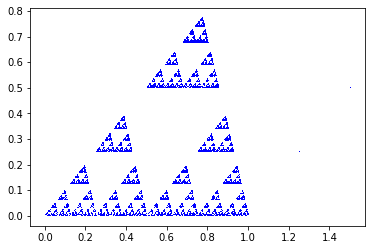

In [ ]:

'''  setting up the fractals to be made using Chaos game.    '''

funct_param = [[1/2,0,0,1/2,0,0,0,0],
            [1/2, 0, 0, 1/2, 0, 0, 1/2, 0],
            [1/2, 0, 0, 1/2, np.pi/4, -np.pi/4, 1/2, 1/2]]


x, y = 2, 1
create_fractal(funct_param, x, y, start=100, end=10000, marker='b,')

### Example 2

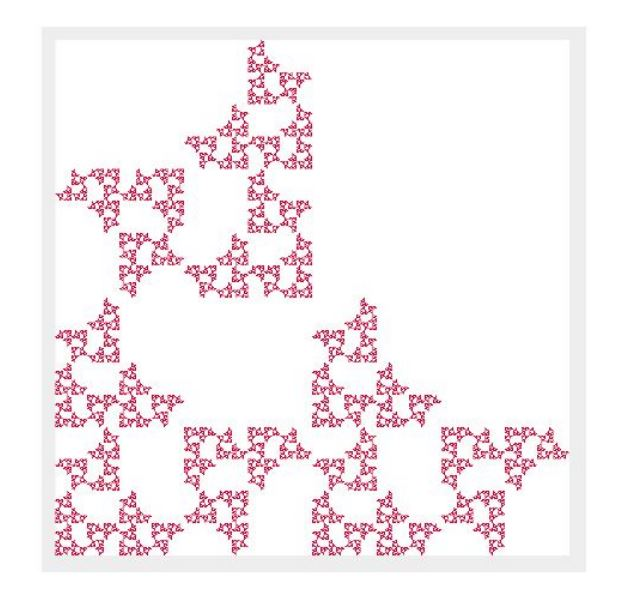



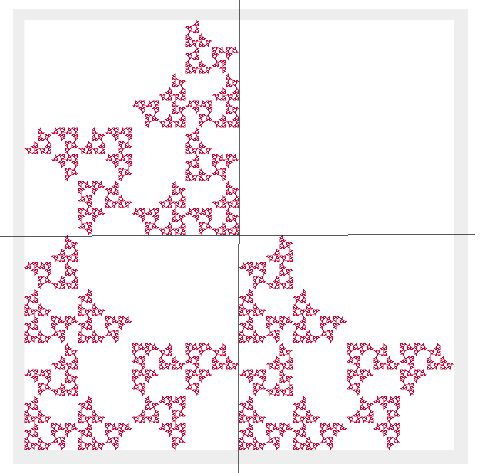



visually you can see Q3 is a scaled by 1/2 of the current image and reflected across the line $y = x$. Resulting in the matrix,
$$
f_1(X) = 
\begin{bmatrix}
0&1/2&0\\
1/2&0&0\\
0&0&1\\
\end{bmatrix}
X
\quad \text{, Where $X = [x,y,1]^T$ }
$$
Q4 is simply a shift of $1/2$ in the x direction of $f_1$ resulting in, 

$$
f_2(X) = 
\begin{bmatrix}
0&1/2&1/2\\
1/2&0&0\\
0&0&1\\
\end{bmatrix}
X
\quad \text{, Where $X = [x,y,1]^T$ }
$$
As for Q2 we can see that it is scaled by $1/2$ and rotated $90^o$ counter clockwise. This also needs to be shifted into position by adding $1/2$ to both $x$ and $y$. Resulting in the matrix, 
$$
f_3(X) = 
\begin{bmatrix}
0&-1/2&1/2\\
1/2&0&1/2\\
0&0&1\\
\end{bmatrix}
X
\quad \text{, Where $X = [x,y,1]^T$ }
$$
Or represented in $F = [a,b,c,d,e,f,g,h]$ notation.
 $F_1 = [0,1/2,1/2,0,\pi/2,-\pi/2,0,0]$
 $F_2 = [0,1/2,1/2,0,\pi/2,-\pi/2,1/2,0]$
 $F_3 = [0,-1/2,1/2,0,\pi/2,-\pi/2,1/2,1/2] $


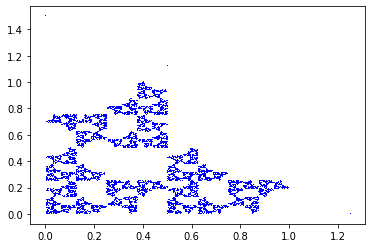

In [ ]:

x, y = 2, 1
funct_param = [[0,1/2,1/2,0,np.pi/2,-np.pi/2,0,0],
            [0,1/2,1/2,0,np.pi/2,-np.pi/2,1/2,0],
            [0,-1/2,1/2,0,np.pi/2,-np.pi/2,1/2,1/2]]


create_fractal(funct_param, x, y, start=100, end=10000, marker='b,')

## Can load and minipulate data

In [ ]:
import altair as alt
import ipywidgets as widgets
from vega_datasets import data


source = data.stocks()

stock_picker = widgets.SelectMultiple(
    options=source.symbol.unique(),
    value=list(source.symbol.unique()),
    description='Symbols')

# The value of symbols will come from the stock_picker.
@widgets.interact(symbols=stock_picker)
def render(symbols):
  selected = source[source.symbol.isin(list(symbols))]

  return alt.Chart(selected).mark_line().encode(
      x='date',
      y='price',
      color='symbol',
      strokeDash='symbol',
  )

interactive(children=(SelectMultiple(description='Symbols', index=(0, 1, 2, 3, 4), options=('MSFT', 'AMZN', 'I…